In [1]:
import torch, torchvision
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt
import copy
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import os
from zipfile import ZipFile
from random import shuffle
from tqdm import tqdm
import cv2
import pickle
import math 

In [2]:
numb_batch = 64

In [3]:
DIRECTORY = r'C:\Users\Luis\Cats_Dogs\dogscats\train'
CATERGORIES = ['cats', 'dogs']


In [4]:
IMG_SIZE = 50
data = []

for catergory in CATERGORIES:
    folder = os.path.join(DIRECTORY, catergory)
    label = CATERGORIES.index(catergory)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_array= cv2.imread(img_path)
        img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
        data.append([img_array, label])                


In [7]:
shuffle(data)

In [8]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [9]:
X = np.array(X) # np.arrays
y = np.array(y) # np.arrays

In [10]:
pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))


In [16]:
# Processing Data Finshed and save into those files ^^^

In [17]:
# Training model but now in pytorch

23000


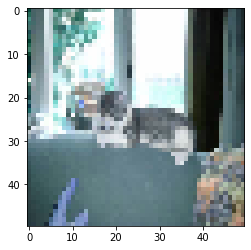

In [15]:
plt.imshow(X[13])
print(len(X))

#  Creating Model

In [ ]:
def create_model():
    model = nn.Sequential(
    nn.Conv2d(1,6,5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    # Second convlayer
    nn.Conv2d(6, 16, 5, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    nn.Flatten(),
    nn.Linear(400, 120),
    nn.ReLU(),
    nn.Linear(120, 84),
    nn.ReLU(),
    nn.Linear(84, 2)
        
    )
    return model

    

#  Validating Model

In [ ]:
def validate(model, data):
    total = 0
    correct = 0
    for i, (images, y) in enumerate(X):
        x = model(images)
        value, pred = torch.max(x, 1)
        total += x.size(0)
        correct += torch.sum(pred == y)
        
    return correct*100./total

# Training Function

In [ ]:
def train(numb_epoch=3, lr=1e-3, device='cpu'):
    accuracies = []
    cnn = create_model().to(device)
    cec = nn.BCELoss()
    optimizer = optim.Adam(cnn.parameters(), lr=lr)
    max_accuracy = 0
    
    for epoch in range(numb_epoch):
        for i, (images, y) in enumerate(data):
            images = images.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred, y)
            loss.backward()
            optimizer.step()
        accuracy = float(validate(cnn, y))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(cnn)
            max_accuracy = accuracy
            print("Saving Best Model with Accuracy: ", accuracy)
        print("Epoch: ", epoch+1, "Accuracy: ", accuracy, "%")
        print("Loss: ", {loss})
        plt.plot(accuracies)
        return best_model
            

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device('cpu')

In [ ]:
device

In [ ]:
cat_v_dog_net = train(5, device=device)
cat_v_dog_net = create_model().to(device)

In [ ]:
type(data)